In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:13) [Clang 14.0.6 ]
scipy: 1.10.0
numpy: 1.23.5
matplotlib: 3.7.0
pandas: 1.5.3
sklearn: 1.2.1


In [3]:
#import data and run stats
file = "iris.csv"
names = ['sepal_len', 'sepal_w', 'petal_len','petal_w', 'class']
data = pandas.read_csv(file, names=names)
description = data.describe()
print(description)

        sepal_len     sepal_w   petal_len     petal_w
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


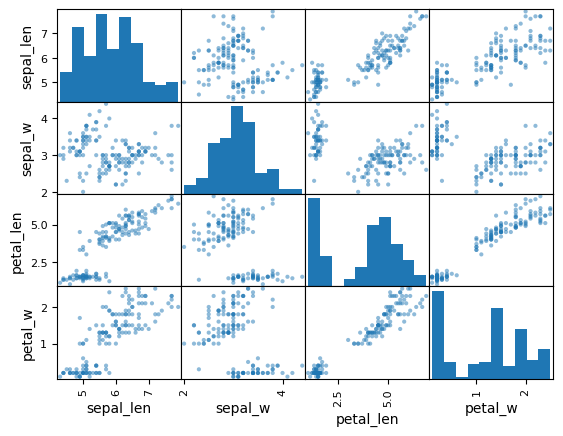

In [6]:
#visualize the data
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [9]:
#preprocessing 
from sklearn.preprocessing import StandardScaler

array = data.values
X = array[:,0:4]
Y = array[:,4]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:3,:])

[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]]


In [10]:
#Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.333% (8.459%)


In [17]:
#improve accuracy with algorithm tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = numpy.array([1,0.1,0.01,0.001,0.0001])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py", line 1126, in fit
    X, y = self._validate_data(
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1147, in _check_y
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'Iris-versicolor'

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py", line 1126, in fit
    X, y = self._validate_data(
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/Users/morgan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1147, in _check_y
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'Iris-setosa'


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.96


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 67%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9
